# Income Prediction Dataset Exercise

## Data Description

You have been given a dataset for income prediction. Your task is to perform data cleaning, analysis, 
and build a predictive model to predict a persons income based on various factors. The dataset contains the following columns:

- **Age:** The age of the individual.
- **Education:** The highest level of education (e.g., High School, Bachelor's, Master's, Doctorate).
- **Occupation:** The occupation of the individual (e.g., Manager, Technician, Sales).
- **Marital Status:** The marital status of the individual (e.g., Married, Single, Divorced).
- **Hours per Week:** The number of hours worked per week.
- **Income (USD):** The annual income of the individual in USD.

## Dataset

Here is the dataset you will be working with:

| Age | Education  | Occupation     | Marital Status | Hours per Week | Income (USD) |
|-----|------------|---------------|----------------|----------------|--------------|
| 42  | Bachelors | Sales         | Married        | 45             | 55000        |
| 28  | High School | Technician    | Single         | 40             | 25000        |
| 35  | Masters   | Manager       | Married        | 55             | 75000        |
| 23  | High School | Technician    | Single         | 35             | 20000        |
| 59  | Doctorate  | Executive     | Married        | 60             | 95000        |
| 31  | Bachelors | Sales         | Single         | 50             | 60000        |



**Note:** The "Education" and "Occupation" columns have categorical values. Your learners may need to perform data encoding or one-hot encoding for these columns.

Your tasks include data cleaning, feature engineering, and building a predictive model to predict income based on the other features.

**Best of luck with your data analysis and modeling!**


In [ ]:
!pip install seaborn

Data    Age  Hours per Week  Income (USD)  Education_Doctorate  \
0   42              45         55000                False   
1   28              40         25000                False   
2   35              55         75000                False   
3   23              35         20000                False   
4   59              60         95000                 True   
5   31              50         60000                False   

   Education_High School  Education_Masters  Occupation_Manager  \
0                  False              False               False   
1                   True              False               False   
2                  False               True                True   
3                   True              False               False   
4                  False              False               False   
5                  False              False               False   

   Occupation_Sales  Occupation_Technician  Marital Status_Single  
0              True          

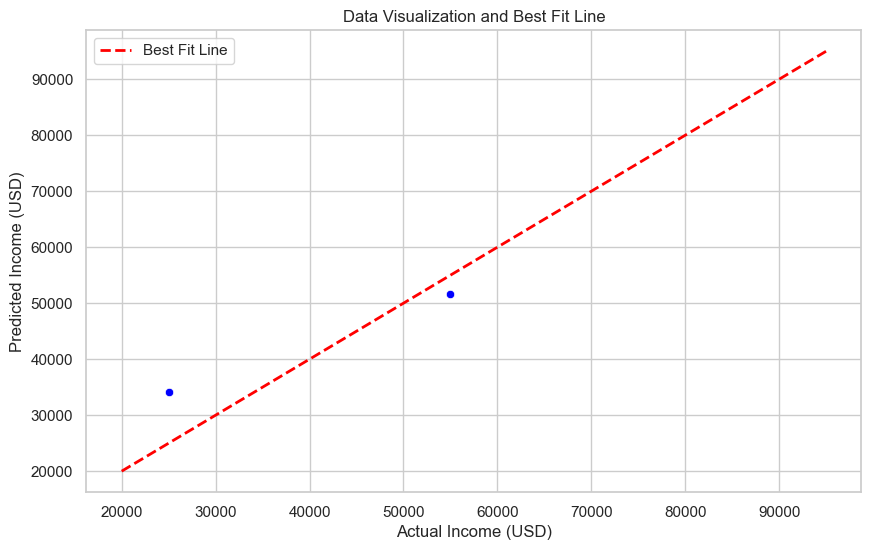

Mean Squared Error: 47293962.10
R-squared (R2) Score: 0.79


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace 'income_dataset.csv' with the actual dataset file)
data = pd.read_csv('income_dataset.csv')
data

# Data Preprocessing: Perform one-hot encoding for categorical columns
data = pd.get_dummies(data, columns=['Education', 'Occupation', 'Marital Status'], drop_first=True)

print("Data", data)

# Split the data into features (X) and target (y)
X = data.drop('Income (USD)', axis=1)
y = data['Income (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("Y prediction:", y_pred)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.title("Data Visualization and Best Fit Line")
plt.xlabel("Actual Income (USD)")
plt.ylabel("Predicted Income (USD)")

# Visualize the best fit line
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', linewidth=2, label="Best Fit Line")
plt.legend(loc='upper left')

plt.show()

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
